## Import Necessary Libraries

In [13]:
# For data processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('datasets/Crop_recommendation.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## EDA

In [15]:
df.columns = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall", "Crop"]

In [16]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


- Variable names are changed so that dataset can be more easily compreheneded by anyone

In [17]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


- This describes the various statistics for each variable of the dataset.

- For example, the mean of the temperature is 48.14(2dp), the minimum temperature is 14.25(2dp) and the maximum temperature is 43.68(2dp).

In [18]:
dfnumeric = pd.DataFrame(df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature','Humidity','pH','Rainfall']])
dfnumeric.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


- This code is to bring out the numeric variables.

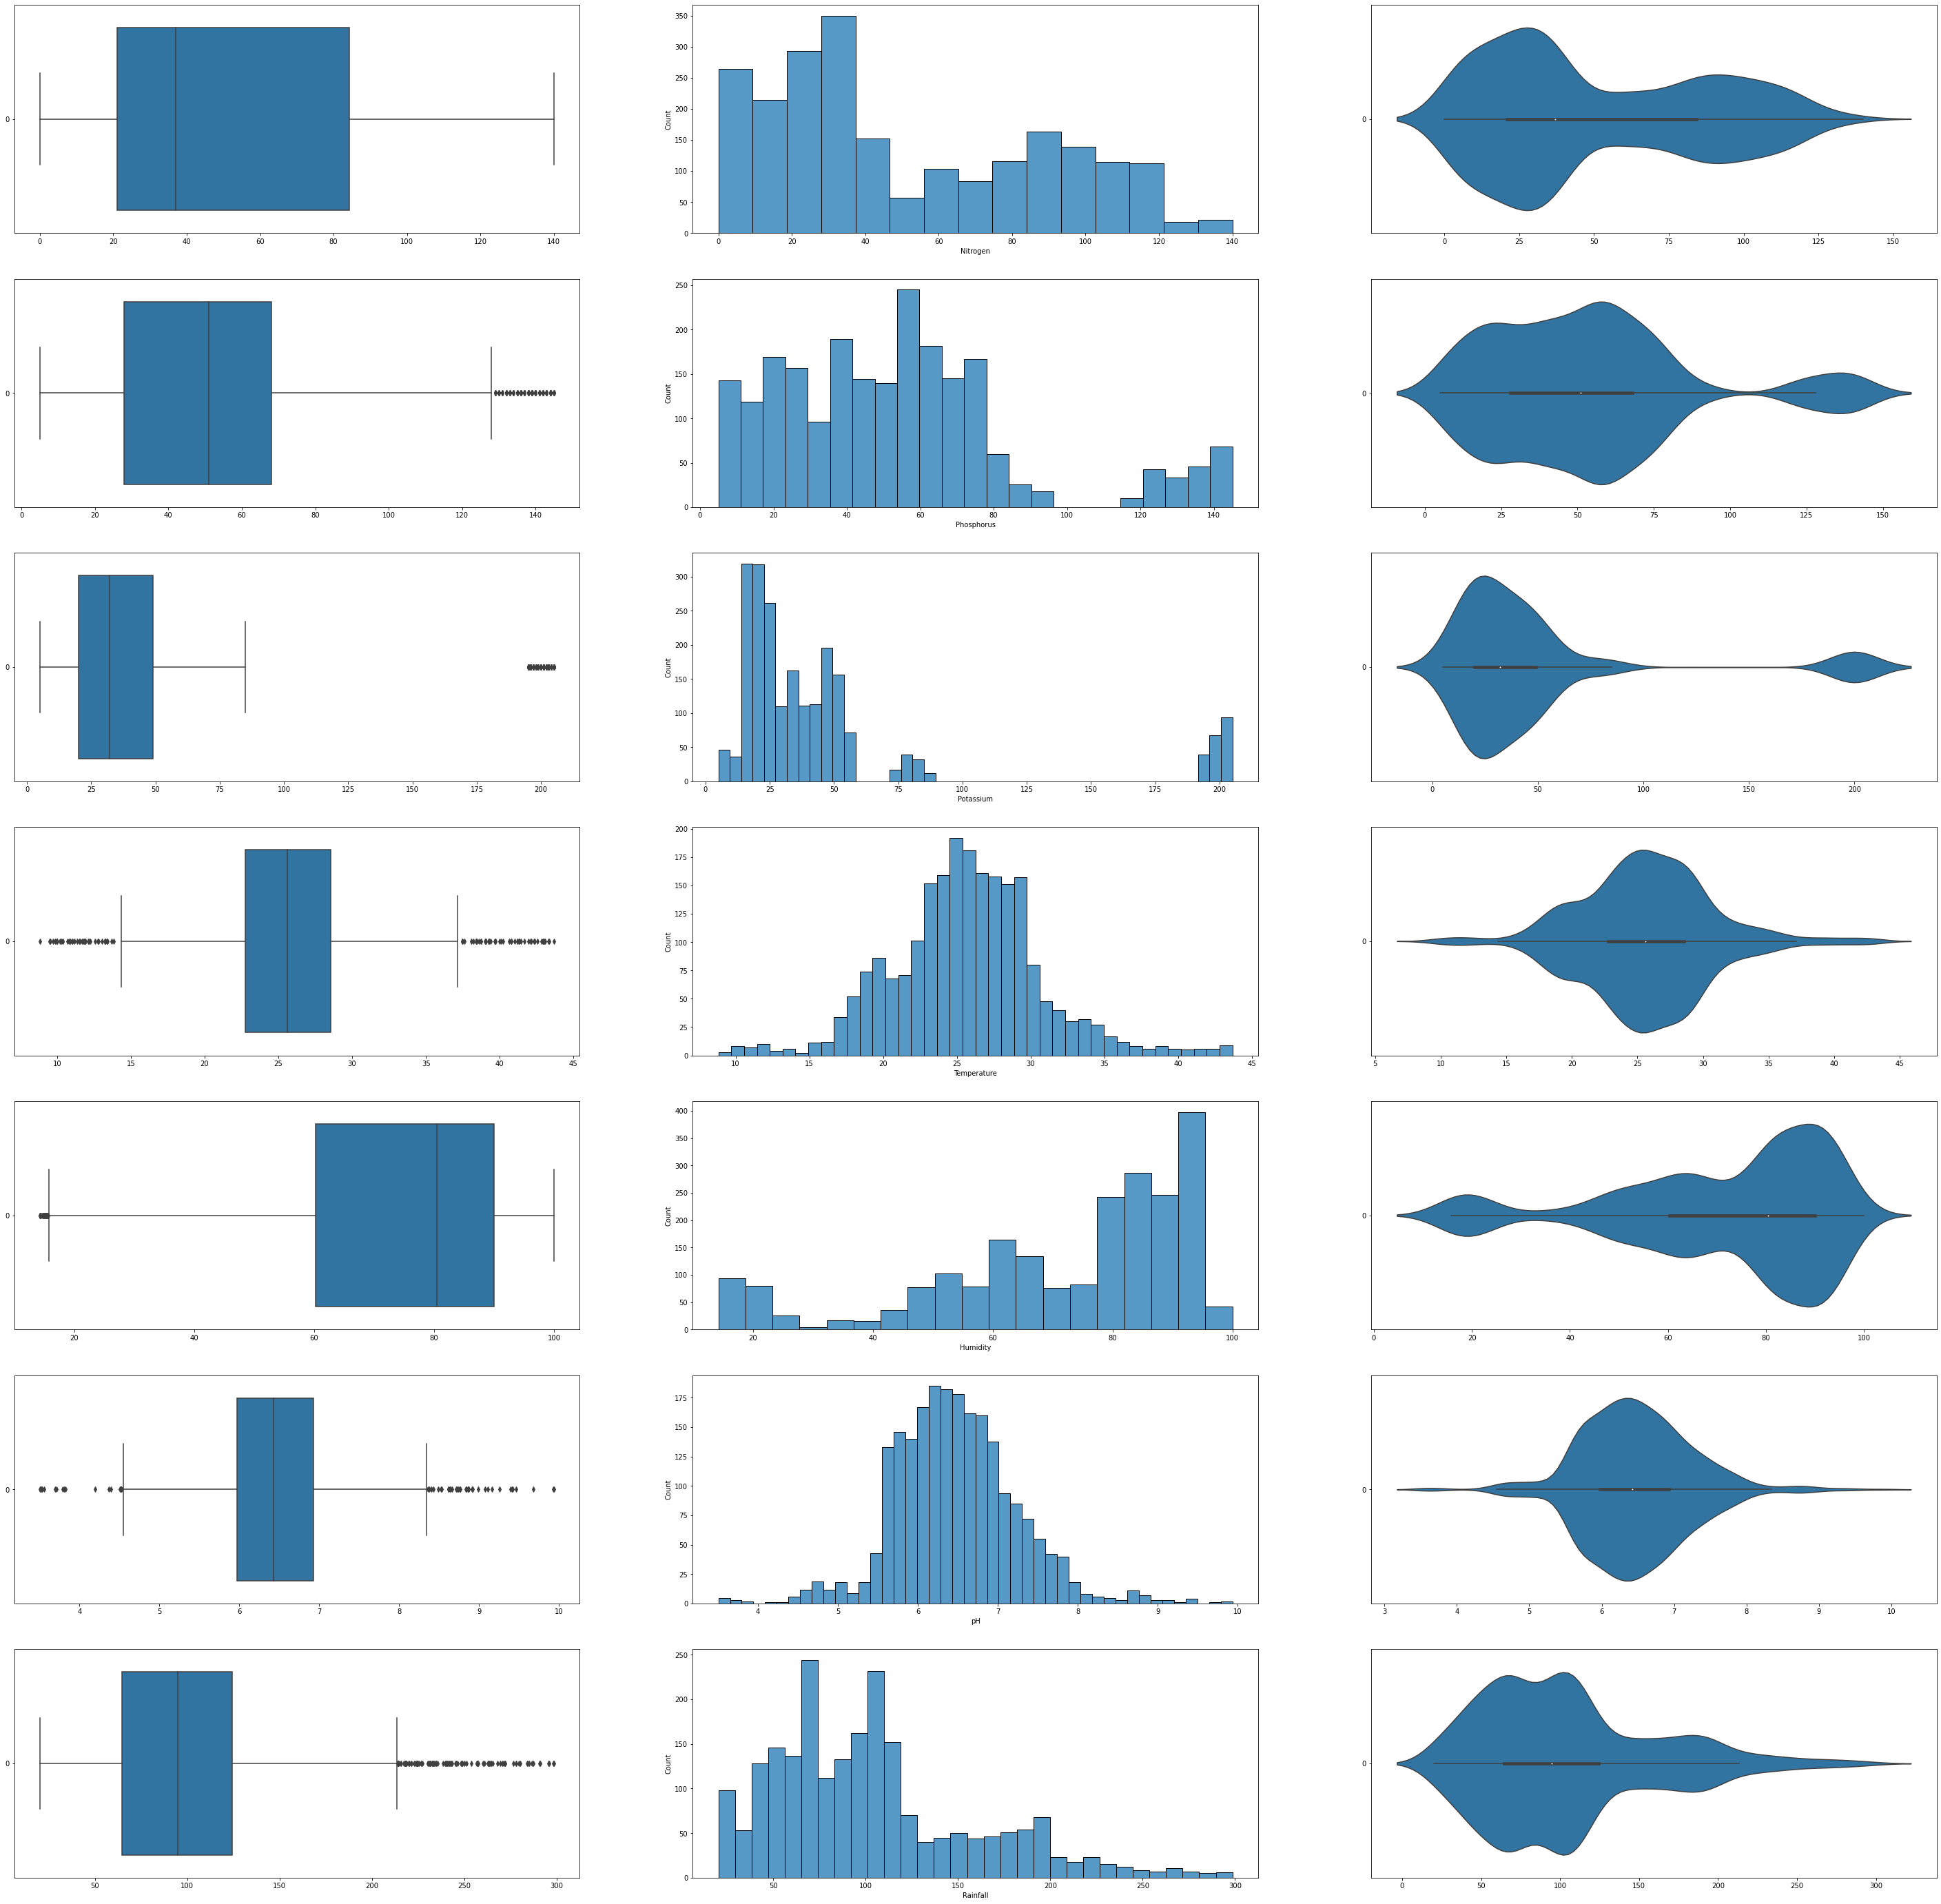

In [19]:
f, axes = plt.subplots(7, 3, figsize=(50, 50))

count = 0
for var in dfnumeric:
    sb.boxplot(data = dfnumeric[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = dfnumeric[var], ax = axes[count,1])
    sb.violinplot(data = dfnumeric[var], orient = "h", ax = axes[count,2])
    count += 1

- This is the visualisation of the each variable in 3 types of plots ( boxplot, histogram and a violin plot).

#### Find the number of outliers in each type of crop. 

In [177]:
# Group the crop data in groups of 100 rows
groupCrops = [dfnumeric[i:i+100] for i in range(0, len(dfnumeric), 100)]

# Find outliers using the IQR method for each group
outliers = pd.DataFrame()
for crop in groupCrops:
    q1 = crop.quantile(0.25)
    q3 = crop.quantile(0.75)
    iqr = q3 - q1
    individualCrop_outliers = crop[((crop < (q1 - 1.5 * iqr)) | (crop > (q3 + 1.5 * iqr))).any(axis=1)]
    outliers = pd.concat([outliers, individualCrop_outliers])

# Print the outliers 
outliers

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall


- The resultant table show no outliers



In [22]:
dfcategorical  = pd.DataFrame(df["Crop"])
dfcategorical

,Crop
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [23]:
dfcategorical.nunique()

Crop    22
dtype: int64

- This code shows the number of labels (the different types of crops) used in the data set

In [24]:
print("Number of various crops: ", len(dfcategorical['Crop'].unique()))
print("List of crops: ", dfcategorical['Crop'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


- This code shows the different types of crops used in this dataset

In [25]:
dfcategorical.value_counts()

Crop       
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
dtype: int64

- This code shows the number of elements in each label. In this case, all the labels have 100 elements.

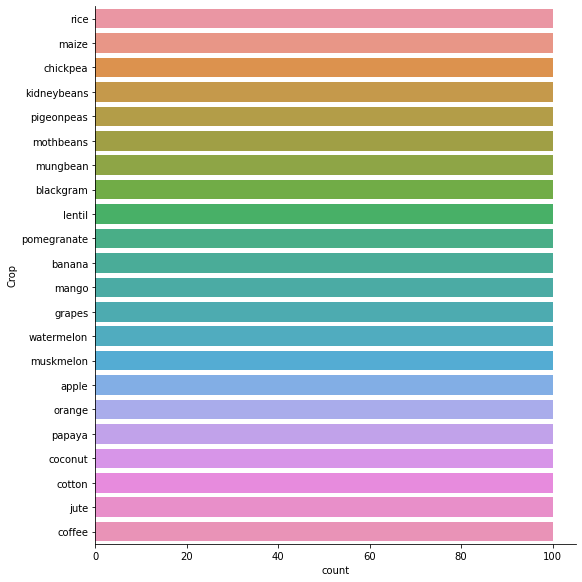

In [26]:
sb.catplot(y = 'Crop', data = dfcategorical, kind = "count", height = 8)

- This code shows categorical plot of the variable 'label'. It is just a continuation of the previous code, showing that there are equal number of elements.

<AxesSubplot:>

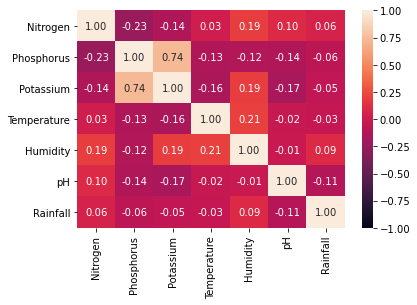

In [27]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From this heatmap, we can infer that for the whole dataset, 'Phosphorus' and 'Potassium' has the highest correlation of +0.74.

## Comparing crops against climate features

<AxesSubplot:xlabel='Potassium', ylabel='Crop'>

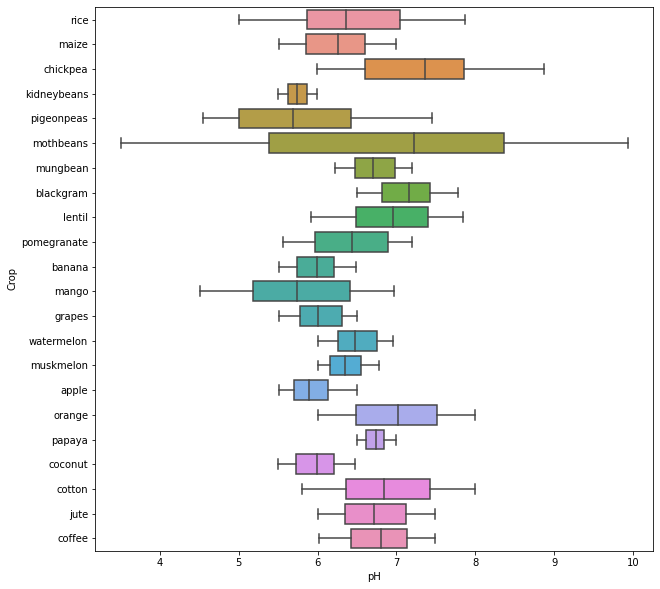

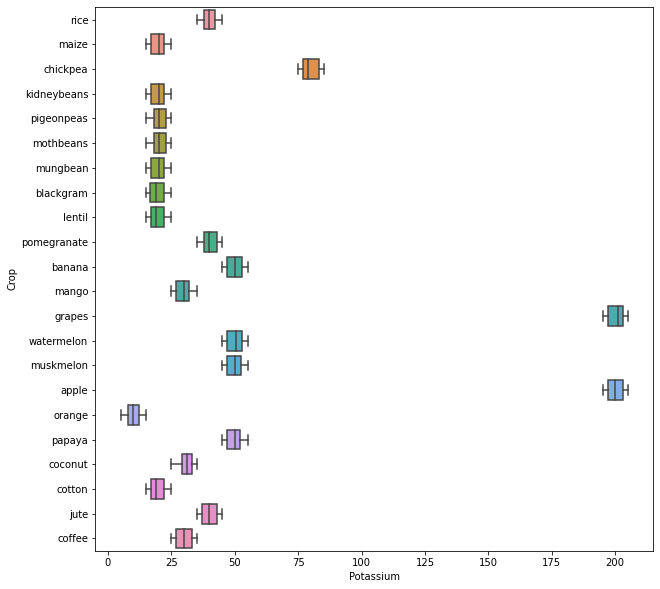

In [28]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='pH',data=df)


fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Potassium',data=df)

This boxplot shows the distribution of each crop across different pH and K values

<AxesSubplot:xlabel='Phosphorus', ylabel='Crop'>

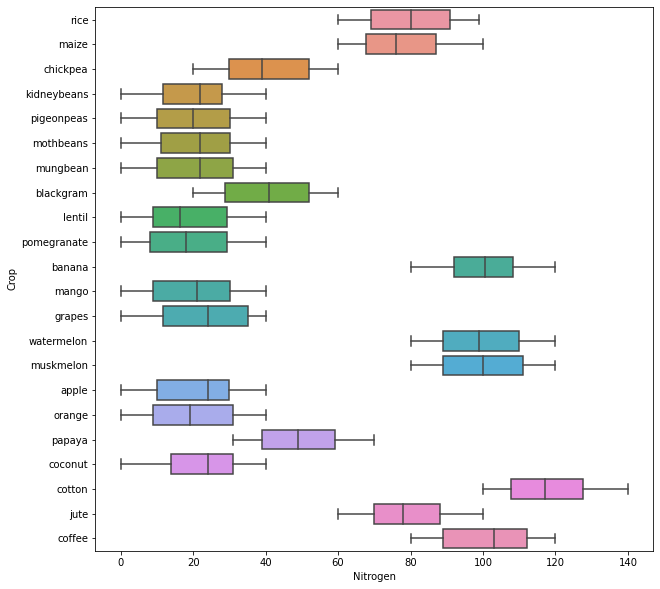

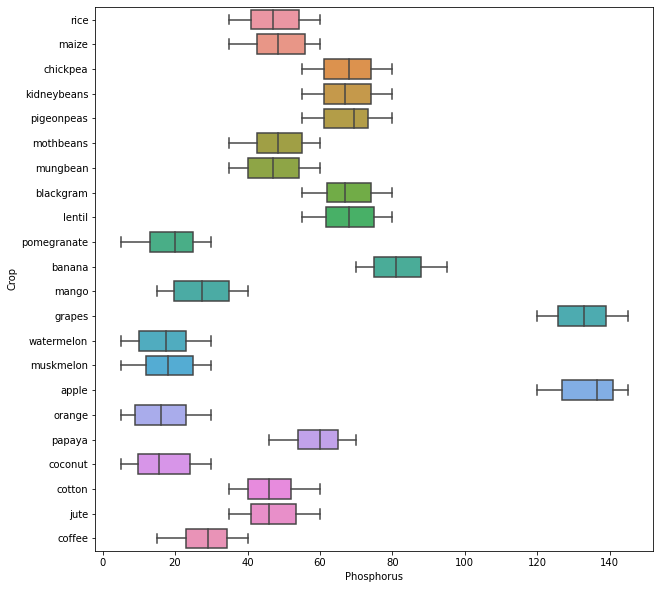

In [29]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Nitrogen',data=df)

fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Phosphorus',data=df)


- This boxplot shows the distribution of each crop across different N and P values

<AxesSubplot:xlabel='Humidity', ylabel='Crop'>

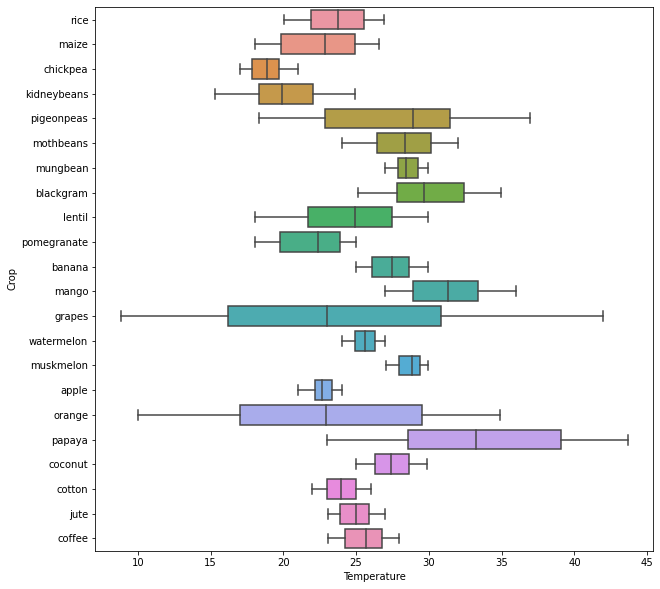

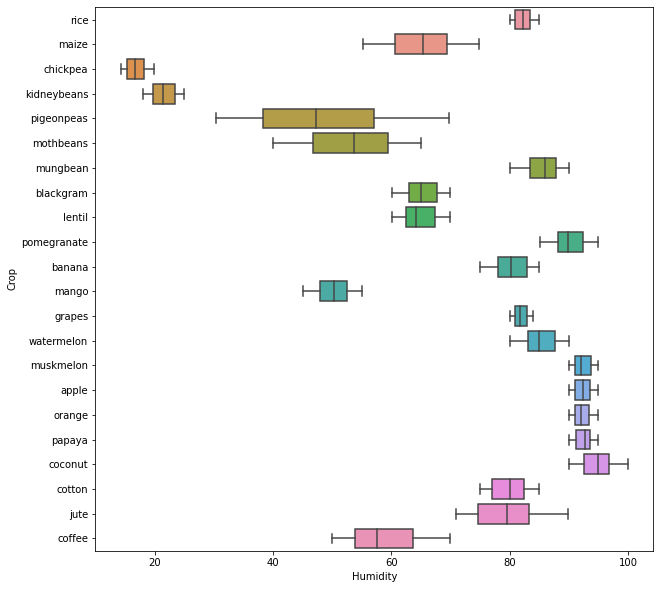

In [30]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Temperature',data=df)

fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Humidity',data=df)


- This boxplot shows the distribution of each crop across different temperature and humidity values

<AxesSubplot:xlabel='Rainfall', ylabel='Crop'>

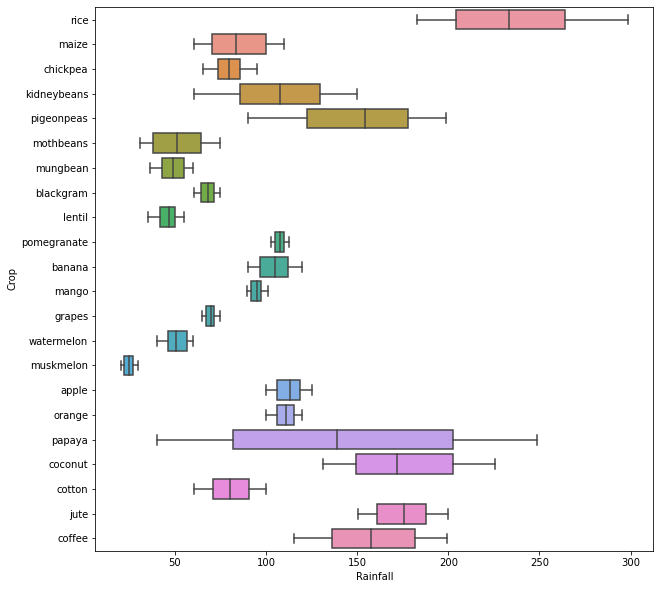

In [31]:
fig,ax = plt.subplots(figsize=(10, 10))
sb.boxplot(y='Crop',x='Rainfall',data=df)



- This boxplot shows the distribution of each crop across different rainfall values

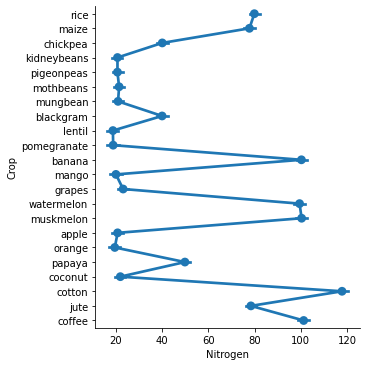

In [32]:
sb.catplot(x='Nitrogen', y='Crop', 
            data=df,
            kind='point')

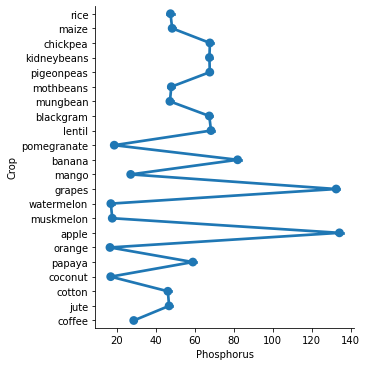

In [33]:
sb.catplot(x='Phosphorus', y='Crop', 
            data=df,
            kind='point')

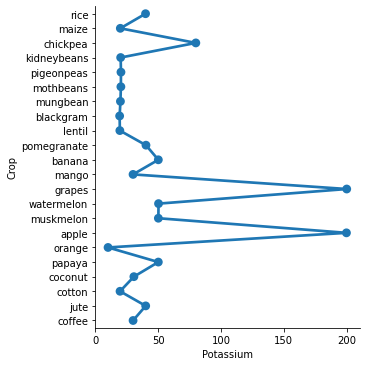

In [34]:

sb.catplot(x='Potassium', y='Crop', 
            data=df,
            kind='point')

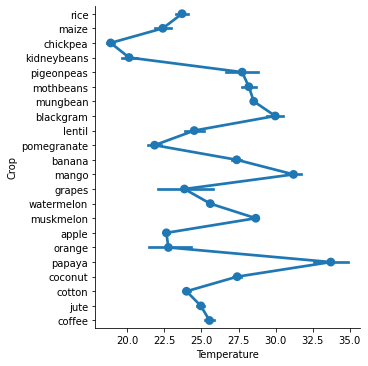

In [35]:
sb.catplot(x='Temperature', y='Crop', 
            data=df,
            kind='point')

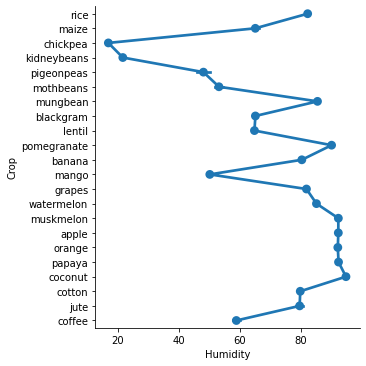

In [36]:
sb.catplot(x='Humidity', y='Crop', 
            data=df,
            kind='point')

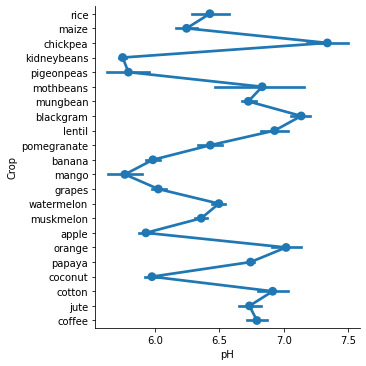

In [37]:
sb.catplot(x='pH', y='Crop', 
            data=df,
            kind='point')

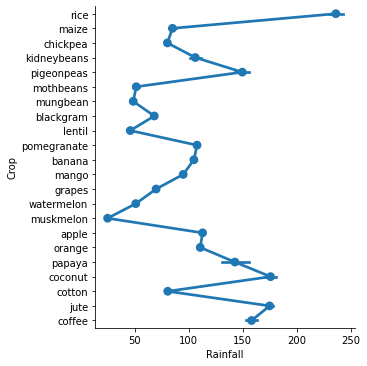

In [38]:
sb.catplot(x='Rainfall', y='Crop', 
            data=df,
            kind='point')

# Machine Learning and Creation of Crop Recommendation System

In this portion we will perform machine learning analysis and store the learnt model.

The problem we are facing is a classification problem. Most of the analysis and models we use, will be classification models. (Exception will be linear regression, to show what happens if a wrong model is used)

We will perform the following:

1. Anomaly detection (previously done, no outliers detected)
2. Data Cleaning
3. Seperation of test and train set
4. Perform Model Training 
    1. Single Decision Tree
    2. Random Forest
    3. Neural Network
    4. Support Vector Machine
    5. Logistical Regression
    6. Linear Regresstion (to show error)
5. Cross validation analysis of each model
6. If Cross Validation is valid, then we store the trained model
7. Compare the accuracy of each model
8. Create a crop recommendation system



### Import Libraries

In [157]:
# Library for ML stuff
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder

# To help split into test and trainset much easily
from sklearn.model_selection import train_test_split

# Import Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#Cross validation
from sklearn.model_selection import cross_val_score




### Clean Data and split into train & test set

Now, we will have to split our data, into the feature (variables which cause change) and target (dependent variable ie what we are trying to predict).

<b>Data Split:</b>  70% train, 30% test

<b>Stratify:</b>  Ensures that for training set, 70% will always be taken for each type of crop, rather than 70% of whole dataset.

<b>random_state:</b> Randomise the selection of 70/30. (we chose 32, so we can reproduce results if random state of 32 is chosen again in another function alter)

In [158]:
features = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH',
       'Rainfall']]
target = df['Crop']
labels = df['Crop']

# Split into Test set and Train set. 70% Train, 30% Test.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3, stratify= target, random_state = 32)

In [159]:
# Create Array to store model name and accuracy for use later
modelAccuracy = []
modelName = []

# Single Decision Tree

In [160]:
# create instance of DecisionTreeClassifier
# Set max depth to 6 to prevent an issue of "overfitting"
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=8)

# fit the model to the training data
DecisionTree.fit(Xtrain,Ytrain)

# use the trained model to predict the classes of the test data
Ypred = DecisionTree.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of Random Forest model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Store Accuracy Results
modelName.append('Decision Tree')
modelAccuracy.append(accuracy)

Accuracy of Random Forest model: 97.73%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.93      0.95        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       0.97      1.00      0.98        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.70      0.82        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.90      0.95        30
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.91      1.00      0.95        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.

In [161]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score.mean()

0.9818181818181818

# RandomForest

Using multiple decision trees to analyse

In [162]:
# create instance of RandomForestClassifier
RandomForestModel = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
RandomForestModel.fit(Xtrain, Ytrain)

# use the trained model to predict the classes of the test data
Ypred = RandomForestModel.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of Random Forest model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Store Accuracy Results
modelName.append('Random Forest')
modelAccuracy.append(accuracy)

Accuracy of Random Forest model: 99.24%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.93      0.93      0.93        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.97      1.00      0.98        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      0.97      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.

In [163]:
# Cross validation score (Random Forest)
score = cross_val_score(RandomForestModel,features,target,cv=5)
score.mean()

0.9945454545454545

# Neural Network (multilayer perceptron)

In [164]:
# create instance of MLPClassifier
NeuralNetworkModel = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state = 2)

# fit the model to the training data
NeuralNetworkModel.fit(Xtrain, Ytrain)

# use the trained model to predict the classes of the test data
Ypred = NeuralNetworkModel.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of MLP Neural Network model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Store Accuracy Results
modelName.append('MLP Neural Network')
modelAccuracy.append(accuracy)

Accuracy of MLP Neural Network model: 97.12%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.93      0.93      0.93        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.87      0.90      0.89        30
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.96      0.90      0.93        30
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.84      0.87      0.85        30
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00   

In [165]:
# Cross validation score (Neural Network)
score = cross_val_score(NeuralNetworkModel,features,target,cv=5)
score.mean()

0.9695454545454545

# SVM Support Vector Machine

In [166]:
# create instance of SVM with linear kernel
SVMModel = SVC(kernel='rbf', random_state=42)

# fit the model to the training data
SVMModel.fit(Xtrain, Ytrain)

# use the trained model to predict the classes of the test data
Ypred = SVMModel.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of SVM model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Store Accuracy Results
modelName.append('Support Vector Machine')
modelAccuracy.append(accuracy)

Accuracy of SVM model: 97.58%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        30
        jute       0.81      1.00      0.90        30
 kidneybeans       0.91      1.00      0.95        30
      lentil       0.91      1.00      0.95        30
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      0.90      0.95        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        

In [167]:
# Cross validation score (SVM Model)
score = cross_val_score(SVMModel,features,target,cv=5)
score.mean()

0.9781818181818182

# Logistical Regression

In [168]:
# Initialize logistic regression model
# Other availible solvers: 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'
# max_iter=1000
logreg = LogisticRegression(solver='liblinear')

# Train the model on the training set
logreg.fit(Xtrain, Ytrain)

# Make predictions on the test set
Ypred = logreg.predict(Xtest)

# Calculate the accuracy score of the model
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy of SVM model: {:.2f}%".format(accuracy * 100))
print(classification_report(Ytest,Ypred))

# Store Accuracy Results
modelName.append('Logistical Regression')
modelAccuracy.append(accuracy)

Accuracy of SVM model: 94.70%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       0.94      1.00      0.97        30
   blackgram       0.82      0.90      0.86        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.91      1.00      0.95        30
      grapes       1.00      1.00      1.00        30
        jute       0.92      0.73      0.81        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.92      0.77      0.84        30
       maize       0.96      0.83      0.89        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.83      0.80      0.81        30
    mungbean       0.91      1.00      0.95        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        

In [169]:
# Cross validation score (Logistical Regression)
score = cross_val_score(logreg,features,target,cv=5)
score.mean()

0.9531818181818181

# Multivariate Linear Regression

As multivariate linear regression is usually performed on numeric datasets, we need to convert the labels (crops) into numeric data

In [170]:
### Proecssing the data for linear regression analysis ###

le = LabelEncoder()
targetLinearReg = le.fit_transform(target)

X_Linear_train, X_Linear_test, Y_Linear_train, Y_Linear_test = train_test_split(features, targetLinearReg, test_size=0.3, stratify= targetLinearReg, random_state=32)

### Linear Regression analysis begins here ###

# Using Training data, fit into the model
LinearReg = LinearRegression()
LinearReg.fit(X_Linear_train,Y_Linear_train)

# Make predictions on the test data
Y_pred = LinearReg.predict(X_Linear_test)

# Score
accuracy = r2_score(Y_Linear_test, Y_pred)
print("Accuracy of the model (R^2): {:.2f}%".format(accuracy*100))


# Append Score to Arrayacc.append(x)
modelName.append('Multivariable Linear Regression')
modelAccuracy.append(accuracy)



Accuracy of the model (R^2): 28.63%


In [171]:
# Cross validation score (MLP Regression Model)
scores = cross_val_score(LinearReg, features, targetLinearReg, cv=5)
score.mean()

0.9531818181818181

This hugely negative value simply show us that the ML model is wrong. 

In [172]:
print(modelName)
print(modelAccuracy)


['Decision Tree', 'Random Forest', 'MLP Neural Network', 'Support Vector Machine', 'Logistical Regression', 'Multivariable Linear Regression']
[0.9772727272727273, 0.9924242424242424, 0.9712121212121212, 0.9757575757575757, 0.946969696969697, 0.28627043024742893]


<AxesSubplot:title={'center':'Compare Model Accuracy'}, xlabel='Accuracy', ylabel='Algorithm'>

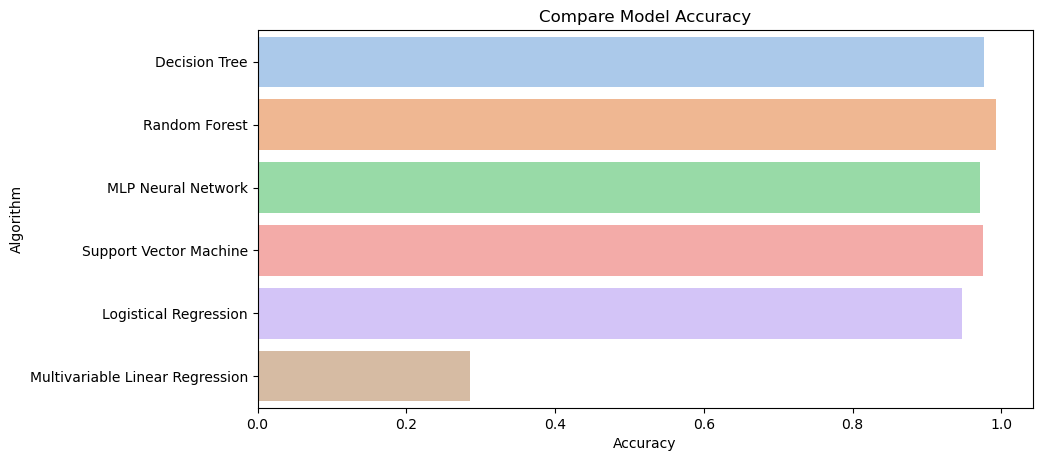

In [176]:
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Compare Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = modelAccuracy,y = modelName,palette='pastel')